<a href="https://colab.research.google.com/github/farimairanbakhsh/MachineLearning2023/blob/main/Chapter1/miniproject1/mini_project1_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1wlxGfzLg0n-WElysHsmnRSUC9-KXFKLF

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1wlxGfzLg0n-WElysHsmnRSUC9-KXFKLF
To: /content/heart_disease_health_indicators.csv
100% 11.8M/11.8M [00:00<00:00, 84.6MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('heart_disease_health_indicators.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [4]:
df = pd.DataFrame(df)

In [5]:
first_column = df.pop('HeartDiseaseorAttack')
df.insert(len(df.columns), 'HeartDiseaseorAttack', first_column)

In [7]:
df_output_1 = df[df['HeartDiseaseorAttack'] == 1].head(100)
df_output_0 = df[df['HeartDiseaseorAttack'] == 0].head(100)

combined_df = df_output_1.append(df_output_0)

<ipython-input-7-56d60b2e394f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = df_output_1.append(df_output_0)


In [8]:
combined_df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttack
8,1,1,1,30,1,0,2,0,1,1,...,0,5,30,30,1,0,9,5,1,1
20,1,1,1,22,0,1,0,0,1,0,...,0,3,30,0,1,0,12,4,4,1
26,1,1,1,37,1,1,2,0,0,1,...,0,5,0,0,1,1,10,6,5,1
27,1,1,1,28,1,0,2,0,0,1,...,0,4,0,0,0,1,12,2,4,1
47,1,1,1,25,1,0,0,0,1,1,...,0,2,1,0,0,1,10,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,1,1,1,26,0,0,0,0,1,1,...,0,5,0,20,1,0,13,6,4,0
112,0,0,1,30,1,0,0,0,0,1,...,0,3,0,0,0,1,9,4,6,0
113,1,0,1,27,0,0,0,1,1,1,...,0,3,0,0,0,1,8,6,8,0
114,0,1,1,26,0,0,0,1,1,0,...,0,2,1,0,0,0,8,6,6,0


In [9]:
X = combined_df.iloc[:,0:-1]
y = combined_df.iloc[:,-1]

In [32]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((160, 21), (160,), (40, 21), (40,))

In [11]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [33]:
model = LogisticRegression(solver='sag', max_iter=300, random_state=83)
model.fit(x_train, y_train)
model.predict(x_test), y_test

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]),
 2      0
 13     0
 52     0
 657    1
 249    1
 807    1
 97     0
 112    0
 681    1
 363    1
 431    1
 100    0
 732    1
 31     0
 28     0
 9      0
 114    0
 221    1
 108    0
 396    1
 797    1
 48     0
 126    1
 393    1
 65     1
 53     0
 60     0
 174    1
 36     0
 10     0
 115    0
 21     0
 69     1
 695    1
 545    1
 70     0
 15     0
 38     0
 541    1
 50     1
 Name: HeartDiseaseorAttack, dtype: int64)

In [17]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.75
0.525


In [18]:
model_proba= model.predict_proba(x_train)

In [12]:
model1 = SGDClassifier(loss= 'log_loss', random_state=83)
model1.fit(x_train, y_train)

SGDClassifier(loss='log_loss', random_state=83)

In [22]:
print(model1.score(x_train, y_train))
print(model1.score(x_test, y_test))

0.6875
0.6


In [13]:
model1_proba= model1.predict_proba(x_train)
model1_proba

array([[0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 8.61743236e-202],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 1.57416943e-095],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 1.15983683e-256],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.0

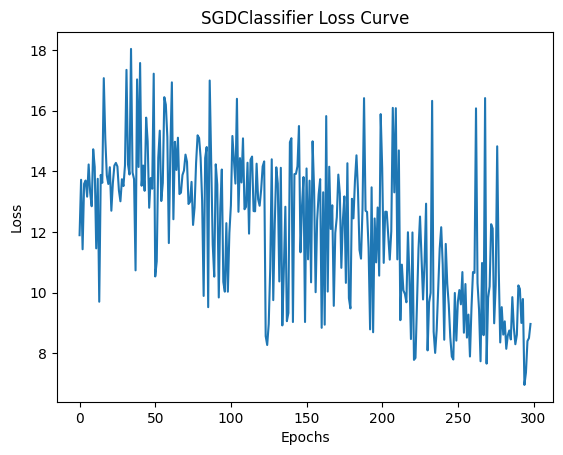

In [28]:
model1 = SGDClassifier(loss='log_loss', random_state=83)
model1.fit(x_train, y_train)

model1_proba = model1.predict_proba(x_train)

losses = []
for epoch in range(1, 300):
    model1.partial_fit(x_train, y_train, classes=np.unique(y_train))
    epoch_loss = log_loss(y_train, model1.predict_proba(x_train))
    losses.append(epoch_loss)

plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGDClassifier Loss Curve')
plt.show()


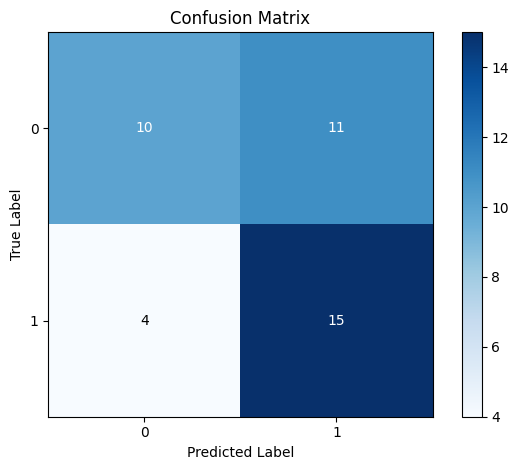

In [40]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

classes = [0, 1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()